<br>
<div align="center">
<font size="7">Genetic Algorithms</font>
</div>

<font size ="5"><b> Required Libraries</b></font> <br><br>
Pillow is used to draw on images of keyboards. In this notebook, Pillow is used to fill blank keyboards with the keys being generated by the AI. It was a very helpful tool while developing and to easily visualize keyboards.

In [1]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


Matplotlib is used to draw graphs. The graphs are used to evaluate the genetic algorithms performance over different generations, as well as offering an easy to understand evaluation of the GA.

In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
#Import neccassary Packages
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont

#Other Imports
import math # Maths equation used
import random # Random number generation
from random import uniform #Random number generation
import matplotlib.pyplot as plt #Graphs
import re #Used for filtering
import time #used to time cells

<font size ="5"><b>Key Class</b></font> <br><br>
A single keyboard key in this implementation represents a class holding a single character. In this notebook the key can be treated as a gene.  This class representation was chosen as some keys might have multiple meanings, such as when "shift" is pressed some keys on the keyboard gain a different meaning. Although not implemented in this GA should future developers wish to include such features, they can build up on the existing code.

In [4]:
#Key Class
class Key:
      def __init__(self, char):
        self.char = char

<font size ="5"><b>"30 Key" Keyboard Settings Class</b></font> <br><br>
For the implementation of this GA a keyboard with a total of 30 keys was used. The keys are the letters of the English Alphabet from A-Z and the following 4 characters: '.' ';' '?' and ','.<br><br>A class was created containing details about the keyboard design such as the legal characters of the keyboard, amount of keys per row and coordinate information for position of the keys. By doing so the legal characters and key positions can be easily updated from a single point of reference. For the purpose of this GA there is also the qwerty layout and azerty layout. This is done since the results obtained from this GA are compared to these layouts.

In [5]:
#Keyboard Settings
class KeyboardSettings30:
    legalChars = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','.',',',';','?']
    qwerty = ['Q','A','Z','W','S','X','E','D','C','R','F','V','T','G','B','Y','H','N','U','J','M','I','K',',','O','L','.','P',';','?']
    azerty = ['A','Q','W','Z','S','X','E','D','C','R','F','V','T','G','B','Y','H','N','U','J',',','I','K','.','O','L',';','P','M','?']
    swedish = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','.','Ö','Ä','Å']

    #X offsets for each row
    x1,x2,x3 = 90,100,120
    
    #Y offsets for each row
    y1,y2,y3 = 185,230,275
    
    #Amount of Characters per row
    rowAmount = 10
    #xDifferenance for each column
    xDifference = 45
    yDifference = 45

In [6]:
#Global Definations 
keyboardSettings30 = KeyboardSettings30() #To be easily referrenced in the rest of the notebook

<font size ="5"><b>Keyboard Positions</b></font> <br><br>
he "get30KeyboardPositions()" function returns a dictionary with the x and y coordinate for each of the keys, this dictionary is created to speed up the process of calculating the distance between two keys. The dictionary uses the index of the keyList array (refer to Keyboard Class) as a key to optimize search time.

In [7]:
def get30KeyboardPositions():
    keyboardPositions = {}
    column=0
    for i in range(0,30):
        row = i % 3
        if row == 0:
            keyboardPositions[i] = (keyboardSettings30.x1 + keyboardSettings30.xDifference*column, keyboardSettings30.y1)
        elif row == 1:
            keyboardPositions[i] = (keyboardSettings30.x2 + keyboardSettings30.xDifference*column, keyboardSettings30.y2)
        else:
            keyboardPositions[i] = (keyboardSettings30.x3 + keyboardSettings30.xDifference*column, keyboardSettings30.y3)
            column +=1
    return keyboardPositions
get30KeyboardPositions()

{0: (90, 185),
 1: (100, 230),
 2: (120, 275),
 3: (135, 185),
 4: (145, 230),
 5: (165, 275),
 6: (180, 185),
 7: (190, 230),
 8: (210, 275),
 9: (225, 185),
 10: (235, 230),
 11: (255, 275),
 12: (270, 185),
 13: (280, 230),
 14: (300, 275),
 15: (315, 185),
 16: (325, 230),
 17: (345, 275),
 18: (360, 185),
 19: (370, 230),
 20: (390, 275),
 21: (405, 185),
 22: (415, 230),
 23: (435, 275),
 24: (450, 185),
 25: (460, 230),
 26: (480, 275),
 27: (495, 185),
 28: (505, 230),
 29: (525, 275)}

In [8]:
#Global Definations 
keyboardPositions30 = get30KeyboardPositions()

<font size ="5"><b>Keyboard Class</b></font> <br><br>
The Keyboard Class takes an array of chars as a parameter and will create a keyboard depending on the parameter given. Each char is meant to represent an instance of the Key class. For this GA the keyboard keys are stored in the array following a vertical manner. Such that when following the qwerty layout the array would be of this order 'Q','A','Z','W','S','X'. For this notebook the keyboard can be treated as the chromosome of the genetic algorithm

In [9]:
class Keyboard:
    def __init__(self, keyList):
        keys = []
        for i in range(0,len(keyList)):
            keys.append(Key(keyList[i]))
        self.keys = keys.copy()
    
    def __str__(self):
        temp = "["
        for key in self.keys:
            temp = temp + "'" + key.char + "'" + ","
        temp = temp + "]"
        return temp

keyboard1 = Keyboard(keyboardSettings30.qwerty)
print(keyboard1)

['Q','A','Z','W','S','X','E','D','C','R','F','V','T','G','B','Y','H','N','U','J','M','I','K',',','O','L','.','P',';','?',]


<font size ="5"><b>Random Keyboard</b></font> <br><br>
The following function is used to generate a random keyboard for the legal chars stored in the keyboard settings.

In [10]:
def getRandomKeyboard():
    tm = keyboardSettings30.legalChars.copy()
    random.shuffle(tm)
    return Keyboard(tm.copy())
keyboard2 = getRandomKeyboard()
print(keyboard2)

['J','M','Z','Y','V','R','W','S','U','H','L','D','F',',','G','X','?','E',';','.','B','P','N','O','A','I','K','C','Q','T',]


<font size ="5"><b>Displaying a Keyboard</b></font> <br><br>
The following function is used to display a keyboard visually, the function grabs a blank image of a keyboard which is locally stored and then places the keys stored in a keyboard class on the image and then returns the image. An example using the Qwerty layout is found as the output of this cell

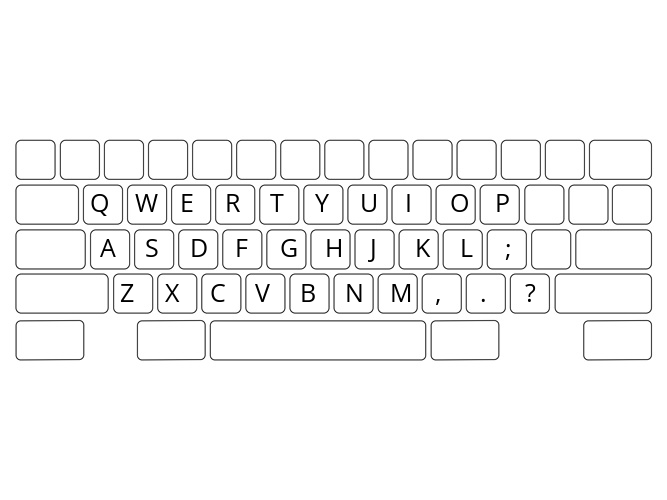

In [11]:
#Display Keyboard Method
def displayKeyboard(keyboard):
    x1,x2,x3 = keyboardSettings30.x1, keyboardSettings30.x2, keyboardSettings30.x3
    y1,y2,y3 = keyboardSettings30.y1, keyboardSettings30.y2, keyboardSettings30.y3
    xDifference = keyboardSettings30.xDifference
    
    #Open Local Image
    img = Image.open('Keyboard_Layout.jpg')
    myFont = ImageFont.truetype('OpenSans-Regular.ttf', 25)
    
    # Call draw Method to add 2D graphics in an image
    I1 = ImageDraw.Draw(img)
    # Add Text to an image
    
    rowAmount = keyboardSettings30.rowAmount
    
    column = 0
    for i in range(0,(rowAmount*3)):
        row = i % 3
        if row == 0:
            I1.text((x1+(xDifference*column), y1), keyboard.keys[i].char, font=myFont, fill =(0, 0, 0))
        elif row == 1:
            I1.text((x2+(xDifference*column), y2), keyboard.keys[i].char, font=myFont, fill =(0, 0, 0))
        else:
            I1.text((x3+(xDifference*column), y3), keyboard.keys[i].char, font=myFont, fill =(0, 0, 0))
            column += 1
    return img
keyboard1 = Keyboard(keyboardSettings30.qwerty)
displayKeyboard(keyboard1)

<font size ="5"><b>Starting Finger Positions</b></font> <br><br>
This genetic algorithm assumes the user uses 10 fingers to type. Two of the fingers hover on the space bar and do not move off the space bar and thus they can be ignored (Due to this reason our dataset will also not contain any spaces). The other finger positions will be placed on the second row of the keyboard. The fingers are split into two groups of 4 four fingers, four fingers hover on the left side of the keyboard, and 4 fingers over the right side of the keyboard. Please refer to the below output of the code cell for a visual representation. For each key marked with a purple circle a finger will be placed there on start.

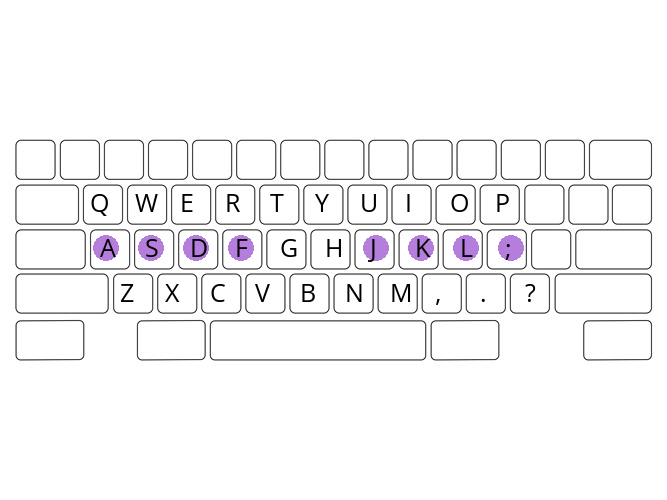

In [12]:
STP = [1,4,7,10,19,22,25,28] # Global Defination
def displayKeyboardWithFinger(keyboard, fingerPositions):
    x1,x2,x3 = keyboardSettings30.x1, keyboardSettings30.x2, keyboardSettings30.x3
    y1,y2,y3 = keyboardSettings30.y1, keyboardSettings30.y2, keyboardSettings30.y3
    xDifference = keyboardSettings30.xDifference
    
    #Open Local Image
    img = Image.open('Keyboard_Layout.jpg')
    myFont = ImageFont.truetype('OpenSans-Regular.ttf', 25)
    
    # Call draw Method to add 2D graphics in an image
    I1 = ImageDraw.Draw(img)
    # Add Text to an image
    
    rowAmount = keyboardSettings30.rowAmount
    
    column = 0
    for i in range(0,(rowAmount*3)):
        row = i % 3
        if row == 0:
            I1.text((x1+(xDifference*column), y1), keyboard.keys[i].char, font=myFont, fill =(0, 0, 0))
        elif row == 1:
            pos = x2+(xDifference*(column))-7
            if i in fingerPositions:
                I1.ellipse((pos, y2+5 , pos+25, y2+30), fill=(181, 126, 220))
            I1.text((x2+(xDifference*column), y2), keyboard.keys[i].char, font=myFont, fill =(0, 0, 0))
        else:
            I1.text((x3+(xDifference*column), y3), keyboard.keys[i].char, font=myFont, fill =(0, 0, 0))
            column += 1
    return img
keyboard1 = Keyboard(keyboardSettings30.qwerty)
displayKeyboardWithFinger(keyboard1, STP)

<font size ="5"><b>GA Training Data Set</b></font> <br><br>
The GA uses different books as a text corpus, the books are obtained from the gutenberg project. For this GA, the following books were used:

1. https://www.gutenberg.org/ebooks/69483
1. https://www.gutenberg.org/ebooks/69474
1. https://www.gutenberg.org/ebooks/24117
1. https://www.gutenberg.org/ebooks/33516

Each book was used in its UTF-8 text format and combined manually into one dataset. The book's terms and agreements (found at the end of each book) were manually removed so as not to include any bias in the data. The bias would have been introduced since each book contains the text and is not a representation of the book's actual content. The text corpus is found in a local file called "unrefinedDataset.txt". The dataset is refined by only keeping characters that make up the legalChars allowed for the keyboard.

In [13]:
def refineDataset():
    refined = open("refinedDataset.txt",mode='w', encoding="utf8")
    unrefined = open("unrefinedDataset.txt", mode='r', encoding="utf8")
    unrefinedString = unrefined.read()
    s1=re.sub("[^A-Za-z.,;?]","",unrefinedString) #Legal Characters allowed
    s1= s1.upper()
    refined.write(s1)
    #print(len(s1))
    #print(s1)
    unrefined.close()
    refined.close()
    
def getRefinedDataset():
    refined = open("refinedDataset.txt",mode='r', encoding="utf8")
    refinedString = refined.read()
    return refinedString

refineDataset()

<font size ="5"><b>Calculating Fitness</b></font><br><br>
The fitness of each keyboard is calculated by getting the geological euclidean distance between the finger location and the key that needs to be pressed. The fitness of a keyboard is the Total Finger Distance/LengthString. This makes the score independent of the number of characters being used in the dataset.

In [14]:
def getCharLocation(keyboard, char):
    for i in range(0,len(keyboard.keys)):
        if(keyboard.keys[i].char == char):
            return i
        
    print(keyboard,char)
    print("No Char Found")

def get8FingerResponsible(charLocation):
    j = 0
    column = math.floor(charLocation / 3) #Divide into column number
    if(column < 3): #Check if first 3 fingers
        return column
    elif(column >= 3 and column <= 6): #Check middle fingers
        if(column == 3 or column == 4): #Check finger 3
            return 3
        else: #Finger 4
            return 4
    else: #Finger 5 to 7
        return column-2
    print("No Return")

In [15]:
def getWeighting(fingerLocation,charLocation):
    if(fingerLocation == charLocation):
        return 0
    hyp = 0
    sideX = abs(keyboardPositions30[fingerLocation][0] - keyboardPositions30[charLocation][0])
    sideY = abs(keyboardPositions30[fingerLocation][1] - keyboardPositions30[charLocation][1])
    hyp = math.sqrt((sideX ** 2) + (sideY ** 2))
    return round(hyp/keyboardSettings30.xDifference,3)
getWeighting(1,4)

1.0

In [16]:
#Calculate the fitness score of typing Hello World
test = "HELLOTHISISATEST" #TestString
STP = [1,4,7,10,19,22,25,28] #StartingPositions

#Find Distance of a string
def calculateDistance(keyboard,dataset,startingFingerPositions):
    CFP = startingFingerPositions.copy() #Set Finger to starting position
    lastMovedFinger = startingFingerPositions[0] #LastMovedFinger
    lastChar = keyboard.keys[startingFingerPositions[0]].char #LastMovedChar
    
    totalDistance = 0 #Set total distance travelled to 0
    
    #Loop Through Dataset
    for element in range(0, len(dataset)):
        
        char = dataset[element] #Store Current Char
        
        if(lastChar == char): #If Previus Char is same as current
            continue
        
        #print("Keyboard Key:", keyboard.keys[element].char)
        charLocation = getCharLocation(keyboard,char) #Get Char Location
        #print("Char and Location:",char,charLocation)
        fingerResponsible = get8FingerResponsible(charLocation) #Get finger responsible
        
        if(fingerResponsible != lastMovedFinger):
            CFP = startingFingerPositions.copy() #Set Finger to starting position
        
        #print(char,fingerResponsible,charLocation)
        totalDistance = round(totalDistance + getWeighting(CFP[fingerResponsible],charLocation),3) #Increment Distance
        CFP[fingerResponsible] = charLocation
        
        lastMovedFinger = fingerResponsible
        lastChar = char
        
    return totalDistance
    
#Fulldataset = getRefinedDataset()
#dataset = Fulldataset[:10000]
#keyboard2 = Keyboard(keyboardSettings30.qwerty)
#calculateDistance(keyboard2,test,STP)

<font size ="5"><b>Single Crossover</b></font> <br><br>
Single Crossover is one of the techniques used for this GA, single point crossover chooses a random key and splits the keyboard into two using the random key as a splitting point. It produces two children, each child having a copy of one of the parents split. The crossover has been constructed in such a way to avoid having duplicate keys in the children.<br>
https://www.geeksforgeeks.org/crossover-in-genetic-algorithm/

In [17]:
def singlePointCrossOver(parent1,parent2):
    child1 = []
    child2 = []
    
    keyRange = len(parent1.keys)
    splittingPoint = random.randint(1,keyRange)
    #print(splittingPoint)
        
    counter1 = 0
    
    child1Contents = ""
    child2Contents = ""
    
    while(counter1 < splittingPoint):
        
        char1 = parent1.keys[counter1].char #Get next Char
        char2 = parent2.keys[counter1].char #Get next Char
        
        #Append Child With corresponding char
        child1.append(char1)
        child2.append(char2)
        
        #Create String with used char
        child1Contents = child1Contents + char1
        child2Contents = child2Contents + char2
        
        #Increment Pointers
        counter1 += 1
    
    parent1Pointer = 0
    parent2Pointer = 0
    counter2 = counter1
    
    #For Child 1 include rest of chars
    while(counter1 < keyRange):
        char = parent2.keys[parent2Pointer].char
        if char not in child1Contents:
            child1.append(char)
            counter1 += 1
        parent2Pointer += 1
    
    while(counter2 < keyRange):
        char = parent1.keys[parent1Pointer].char
        if char not in child2Contents:
            child2.append(char)
            counter2 += 1
        parent1Pointer += 1
    
    child1KB = Keyboard(child1)
    child2KB = Keyboard(child2)
    return child1KB,child2KB

#keyboard1 = Keyboard(KeyboardSettings30.qwerty)
#keyboard2 = getRandomKeyboard()
#keyboard3, keyboard4 = singlePointCrossOver(keyboard1,keyboard2)
#print(keyboard1)
#print(keyboard2)
#print(keyboard3)
#print(keyboard4)

<font size ="5"><b>Two Point Crossover</b></font> <br><br>
Two Point Crossover is one of the techniques used for this GA, two point crossover chooses two random keys and splits the keyboard into three using the random keys as splitting points. Like the single crossover the algorithm produces two children which don't have duplicate keys.<br>
https://www.geeksforgeeks.org/crossover-in-genetic-algorithm/

In [18]:
def TwoPointCrossOver(parent1,parent2):
    child1 = []
    child2 = []
    
    keyRange = len(parent1.keys)
    splittingPoint1 = random.randint(1,keyRange//2)
    splittingPoint2 = random.randint(keyRange//2,keyRange-1)
    #print(splittingPoint1,splittingPoint2)  
    counter1 = 0
    
    child1Contents = ""
    child2Contents = ""
    
    while(counter1 < splittingPoint1):
        
        char1 = parent1.keys[counter1].char #Get next Char
        char2 = parent2.keys[counter1].char #Get next Char
        
        #Append Child With corresponding char
        child1.append(char1)
        child2.append(char2)
        
        #Create String with used char
        child1Contents = child1Contents + char1
        child2Contents = child2Contents + char2
        
        #Increment Pointers
        counter1 += 1
    
    parent1Pointer = 0
    parent2Pointer = 0
    tempHolder = counter1
    counter2 = counter1
    
    while(counter1 < splittingPoint2):
        char = parent2.keys[parent2Pointer].char
        if char not in child1Contents:
            child1.append(char)
            child1Contents = child1Contents + char
            counter1 += 1
        parent2Pointer += 1

    while(counter2 < splittingPoint2):
        char = parent1.keys[parent1Pointer].char
        if char not in child2Contents:
            child2.append(char)
            child2Contents = child2Contents + char
            counter2 += 1
        parent1Pointer += 1
    
    parent1Pointer = tempHolder
    parent2Pointer = tempHolder
    
    while(counter1 < keyRange):
        char = parent1.keys[parent1Pointer].char
        if char not in child1Contents:
            child1.append(char)
            counter1 += 1
        parent1Pointer += 1
        
    while(counter2 < keyRange):
        char = parent2.keys[parent2Pointer].char
        if char not in child2Contents:
            child2.append(char)
            counter2 += 1
        parent2Pointer += 1

    child1KB = Keyboard(child1)
    child2KB = Keyboard(child2)
    return child1KB,child2KB

keyboard1 = getRandomKeyboard()
keyboard2 = getRandomKeyboard()
keyboard3, keyboard4 = TwoPointCrossOver(keyboard1,keyboard2)


<font size ="5"><b>Different Mutations</b></font> <br><br>
The GA uses three different combinations of mutations which are the following:<br>
1. <u>Swap Mutation:</u> A randomly selected keyboard has two random keys swapped at random, this mutation does not greatly affect the fitness of a keyboard but could introduce random improvements.
1. <u>Scramble Mutation:</u> A random keyboard has two points randomly selected and then the keys that fall within that range are randomly shuffled. This mutation can drastically change the fitness score of a keyboard depending on the range given.
1. <u>Inverse Mutation:</u> A  random keyboard has two points randomly selected and then the keys that fall within that range are inverted.<br>

https://www.geeksforgeeks.org/mutation-algorithms-for-string-manipulation-ga/

In [19]:
#Swap Mutation
def swapKeys(keyboard, p1,p2):
    temp = keyboard.keys[p1].char
    keyboard.keys[p1].char = keyboard.keys[p2].char
    keyboard.keys[p2].char = temp

def swapMutation(keyboard):
    #Get 2 random positions
    position1 = random.randint(0,len(keyboard.keys)-1)
    position2 = random.randint(0,len(keyboard.keys)-1)
    while position1 == position2:
        position2 = random.randint(0,len(keyboard.keys)-1)
    #swapKeys
    swapKeys(keyboard,position1,position2)
    
#Scramble Mutation
def scrambleMutation(keyboard):
    #Get two random keys
    position1 = random.randint(0,len(keyboard.keys)-1)
    position2 = random.randint(0,len(keyboard.keys)-1)
    while position1 == position2:
        position2 = random.randint(0,len(keyboard.keys)-1)
    
    #Switch for position 1 to be smaller
    if(position2 < position1):
        temp = position2
        position2 = position1
        position1 = temp
    
    
    chars = []
    for i in range(position1,position2):
        chars.append(keyboard.keys[i].char)
    random.shuffle(chars)
    
    for i in range(position1,position2):
        keyboard.keys[i].char = chars[i-position1]
        
#Inversion Mutation
def inverseMutation(keyboard):
    position1 = random.randint(0,len(keyboard.keys)-1)
    position2 = random.randint(0,len(keyboard.keys)-1)
    while position1 == position2:
        position2 = random.randint(0,len(keyboard.keys)-1)
    
    #Switch for position 1 to be smaller
    if(position2 < position1):
        temp = position2
        position2 = position1
        position1 = temp
    
    
    chars = []
    for i in range(position1,position2):
        chars.append(keyboard.keys[i].char)
    
    diff = position2 - position1
    i = 0
    while(diff <= 0):
        keyboard.keys[i].char = chars[diff]
        i += 1
    

#swapMutation(keyboard1)
#keyboard1 = getRandomKeyboard()
#scrambleMutation(keyboard1)
#inverseMutation(keyboard1)

<font size ="5"><b>Population</b></font> <br><br>
The population is made up of a number of keyboards. This Population is represented as a class and on initialization it will generate a population of random keyboards. It also contains two functions, one to calculate the fitness of the current population and to store the details of the population fitness. The other function is to assign a new set of keyboards to a population to change the population. 

In [3]:
def SortPopulationFunction(population):
    return population[1]

#Population Functions
class Population():
    probChosen = []
    #Initialzing Keyboard
    def __init__(self, populationSize):
        keyboard = []
        self.probChosen = []
        self.keyboard = []
        self.cumulativeProbability = []
            
        #Set Population Size
        self.populationSize = populationSize
        
        #Create a random Population
        for i in range(0,populationSize):
            tm = getRandomKeyboard()
            keyboard.append(tm)
        self.keyboard = keyboard
        
        #Assign the probability according the size (Rank Based Selection)
        totalWeights = 0
        for i in range(1,populationSize+1):
            totalWeights += i
            
        #Give Rank Based Probability 
        for i in range(1,populationSize+1):
            self.probChosen.append(round(i/totalWeights,4))
            
        #Sort to match find Population Fitness
        self.probChosen.sort(reverse=True)
        
        #Give Cumulitive Probablity
        cumulativeProbability = [self.probChosen[0]]
        for value in self.probChosen[1:]:
            cumulativeProbability.append(round(value + cumulativeProbability[-1],4))
        self.cumulativeProbability = cumulativeProbability 
        self.populationFitness = []
    
    #Finding Population Fitness
    def findPopulationFitness(self,dataset,startingFingerPositions):
        populationBestFitness = (self.populationSize+1,10000000)
        populationFitness = []
        fitness = 0
        populationTotalFitness = 0
        
        for i in range(0,self.populationSize):
            
            #GetFitness
            #print("Pop Test:",dataset,startingFingerPositions)
            fitness = calculateDistance(self.keyboard[i],dataset,startingFingerPositions.copy())
            populationTotalFitness += fitness
        
            #Add to populationFitness
            populationFitness.append((i,fitness))
        
            #Check if fitness is the best
            if (fitness <= populationBestFitness[1]):
                populationBestFitness = (i,fitness)
            
        populationFitness.sort(key = SortPopulationFunction)
        self.populationFitness = populationFitness.copy()
        self.populationTotalFitness = populationTotalFitness
        self.populationAvgFitness = round(populationTotalFitness/self.populationSize,3)
        
    def assignNewPopulation(self,keyboardList):
        for i in range(0,self.populationSize):
            self.keyboard[i] = keyboardList[i]
        
#pop = Population(10)
#print(pop.keyboard[1].keys[1].char)
#pop1 = Population(10)
#print(pop1.keyboard[1].keys[1].char)

<font size ="5"><b>Roullette Wheel</b></font> <br><br>

Roulette wheel selection selects random parents depending on the probability of them being selected, which is based on their fitness score. 

In [21]:
def roulletteWheel(population):
    parents = []
    for parentNum in range(0,int(population.populationSize/2)):
        randomNumber = round(uniform(0, 1),4)
        count = 0
        choose = 0
        for value in population.probChosen:
            choose = choose + value
            if choose >= randomNumber:
                parents.append(count)
                break
            count +=1
    return parents

In [22]:
def breedPopulation(rwSelection,population):
    HlvPopSize = len(rwSelection)
    newPopulation = []
    for pop in range(0,HlvPopSize):

        #Get two different parents
        randP1 = random.randint(0, HlvPopSize-1)
        randP2 = random.randint(0, HlvPopSize-1)
        while (randP1 == randP2):
            randP2 = random.randint(0, HlvPopSize-1)
        
        children = singlePointCrossOver(population.keyboard[population.populationFitness[rwSelection[randP1]][0]],
                                        population.keyboard[population.populationFitness[rwSelection[randP2]][0]])
        newPopulation.append(children[0])
        newPopulation.append(children[1])
    population.assignNewPopulation(newPopulation)
pop2 = Population(10)
STP = [1,4,7,10,19,22,25,28] #StartingPositions
pop2.findPopulationFitness("HELLO",STP)
rw = roulletteWheel(pop2)
#print(rw)
#print(pop2.populationFitness)
#print(pop2.probChosen)
#print(pop2.populationSize)
#breedPopulation(rw,pop)
#print(pop.keyboard[0].keys[0].char)  

In [23]:
#Breeding with Elitism
def breedElitePopulation(rwSelection,population,elitismRate):
    HlvPopSize = len(rwSelection)
    elitismNum = population.populationSize * elitismRate
    childrenNeeded = HlvPopSize-(int(elitismNum/2))
    
    newPopulation = []
    
    for pop in range(0,int(elitismNum)):
        newPopulation.append(population.keyboard[population.populationFitness[pop][0]])
    
    for pop in range(0,childrenNeeded):
        randP1 = random.randint(0, childrenNeeded-1)
        randP2 = random.randint(0, childrenNeeded-1)
        while (randP1 == randP2):
            randP2 = random.randint(0, childrenNeeded-1)
        
        children = singlePointCrossOver(population.keyboard[population.populationFitness[rwSelection[randP1]][0]],
                                        population.keyboard[population.populationFitness[rwSelection[randP2]][0]])
        newPopulation.append(children[0])
        newPopulation.append(children[1])
    population.assignNewPopulation(newPopulation)
#popz = Population(10)
#breedElitePopulation(rw,pop,0.1)
#print(pop.keyboard[0].keys[0].char)  

In [24]:
def breedTwoElitePopulation(rwSelection,population,elitismRate):
    HlvPopSize = len(rwSelection)
    elitismNum = population.populationSize * elitismRate
    childrenNeeded = HlvPopSize-(int(elitismNum/2))
    
    newPopulation = []
    
    for pop in range(0,int(elitismNum)):
        newPopulation.append(population.keyboard[population.populationFitness[pop][0]])
        
    for pop in range(0,childrenNeeded):

        #Get two different parents
        randP1 = random.randint(0, HlvPopSize-1)
        randP2 = random.randint(0, HlvPopSize-1)
        while (randP1 == randP2):
            randP2 = random.randint(0, HlvPopSize-1)
        
        #CrossoverFunction
        children = TwoPointCrossOver(population.keyboard[population.populationFitness[rwSelection[randP1]][0]],
                                     population.keyboard[population.populationFitness[rwSelection[randP2]][0]])
        newPopulation.append(children[0])
        newPopulation.append(children[1])
    population.assignNewPopulation(newPopulation)


In [75]:
# plotting the points
def createList(r1, r2):
    return [item for item in range(r1, r2+1)]

<font size ="5"><b>Evaulation of Qwerty and Azerty Layouts</b></font><br><br>
The score of the Qwerty and Azerty keyboard layouts are noted and compared with the upcoming genetic algorithms.

In [26]:
Fulldataset = getRefinedDataset()
dataset = Fulldataset[:-200000]
qwerty = Keyboard(keyboardSettings30.qwerty)
print(round(calculateDistance(qwerty,dataset,STP)/len(dataset),4))

0.8322


In [27]:
Fulldataset = getRefinedDataset()
dataset = Fulldataset[:-200000]
azerty = Keyboard(keyboardSettings30.azerty)
print(round(calculateDistance(azerty,dataset,STP)/len(dataset),4))

0.8988


<font size ="6"><b><center>Different Genetic Algorithms</center></b></font> <br><br>
<font size ="5"><b>Basic GA</b></font><br><br>
The basic GA will have the following traits:<br>
- Population: 50
- Generations: 50
- Text Corpus: 100,000 characters
- Crossover Method: Single point crossover
- Selection Model: Best 50%
- Mutation Method: None
- Elitism: None
- Stopping Mechanism: 15 generations no change or 50 generations

In [28]:
def BasicGeneticAlgorithim(generations,popSize,dataset,STP):
    #Create Population
    pop = Population(popSize)
    
    avgPopList = []
    bestPopList = []
    datasetSize = len(dataset)
    converged = 0
    
    #Loop Generations
    for generation in (range(0,generations)):
        
        pop.findPopulationFitness(dataset,STP.copy()) #Find PopulationFitness
        
        #print("Generation: ", generation, "AveragePopulationFitness: ", round(pop.populationAvgFitness/datasetSize,4), "Best Population: ",
        #    pop.populationFitness[0][0],"BestFitness:", round(pop.populationFitness[0][1]/datasetSize,4))
        
        avgPopList.append(pop.populationAvgFitness/datasetSize)
        bestPopList.append(pop.populationFitness[0][1]/datasetSize)
        
        if(generation > 2):
            if(avgPopList[-1] == avgPopList[-2]):
                converge += 1
                if(converge == 15):
                    return pop,avgPopList,bestPopList,generation
            else:
                converge = 0
            
        selection = []
        for i in range(0,math.floor(popSize/2)):
            selection.append(i)
        breedPopulation(selection,pop) #Breed Children and assign pop
            
    return pop,avgPopList,bestPopList,generations

In [29]:
STP = [1,4,7,10,19,22,25,28] #StartingPositions

Fulldataset = getRefinedDataset()
dataset = Fulldataset[:100000]
dataset2 = Fulldataset[100000:200000]
population = 50
generations = 50

st = time.process_time()
bestKeyboardBasic,avgFitBasic,bestFitBasic,generationsBasic = BasicGeneticAlgorithim(population,generations,dataset,STP)
et = time.process_time()
elapsed_time = et - st
print('Execution time:', elapsed_time, 'seconds')

st2 = time.process_time()
bestKeyboardBasic2,avgFitBasic2,bestFitBasic2,generationsBasic2 = BasicGeneticAlgorithim(population,generations,dataset2,STP)
et2 = time.process_time()
elapsed_time2 = et2 - st2
print('Execution time:', elapsed_time2, 'seconds')

Execution time: 580.46875 seconds
Execution time: 523.984375 seconds


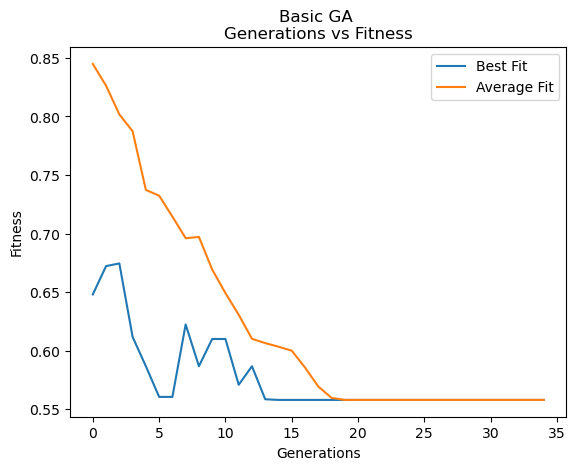

In [76]:
gen = createList(0,generationsBasic2)
plt.plot(gen, bestFitBasic2)
plt.plot(gen, avgFitBasic2)
plt.legend(['Best Fit','Average Fit'])
# naming the x axis
plt.xlabel('Generations')
# naming the y axis
plt.ylabel('Fitness')
  
# giving a title to my graph
plt.title('Basic GA \nGenerations vs Fitness')
  
# function to show the plot
plt.show()

In [31]:
Sampledataset = Fulldataset[:-200000]
print("Generations Run 1: ", generationsBasic)
print("Generations Run 2: ", generationsBasic2)
print("Fitness Run 1: ", round(calculateDistance(bestKeyboardBasic.keyboard[0],Sampledataset,STP)/len(Sampledataset),4))
print("Fitness Run 2: ", round(calculateDistance(bestKeyboardBasic2.keyboard[0],Sampledataset,STP)/len(Sampledataset),4))

Generations Run 1:  36
Generations Run 2:  34
Fitness Run 1:  0.5226
Fitness Run 2:  0.5684


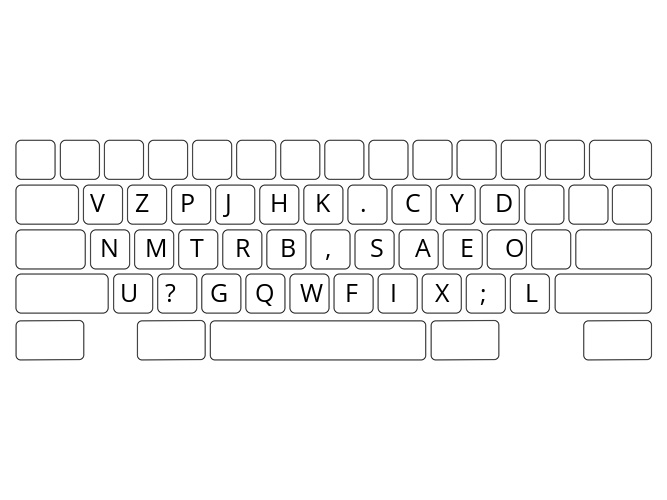

In [32]:
displayKeyboard(bestKeyboardBasic.keyboard[0])

In [33]:
def GeneticAlgorithim(generations,popSize,dataset,STP,twoCrossOverFlag, elitismRate, mutationRate, swapChance, shuffleChance, inverseChance):
    #Create Population
    pop = Population(popSize)
    
    avgPopList = []
    bestPopList = []
    datasetSize = len(dataset)
    converged = 0
    
    #Loop Generations
    for generation in (range(0,generations)):
        
        pop.findPopulationFitness(dataset,STP.copy()) #Find PopulationFitness
        
        #print("Generation: ", generation, "AveragePopulationFitness: ", round(pop.populationAvgFitness/datasetSize,4), "Best Population: ",
        #    pop.populationFitness[0][0],"BestFitness:", round(pop.populationFitness[0][1]/datasetSize,4))
        
        avgPopList.append(pop.populationAvgFitness/datasetSize)
        bestPopList.append(pop.populationFitness[0][1]/datasetSize)
            
        rwSelection = roulletteWheel(pop).copy() #Choose parents
        
        if(twoCrossOverFlag):
            breedTwoElitePopulation(rwSelection,pop,elitismRate) #Breed Children and assign pop
        else:
            breedElitePopulation(rwSelection,pop,elitismRate) #Breed Children and assign pop
        #Mutation
        for i in range(0,popSize):
            #Get Mutation Chance
            mutateRoll = random.uniform(0, 1)
            if(mutateRoll < mutationRate):
                typeRoll = random.uniform(0, 1)
                if(typeRoll > swapChance+shuffleChance):
                    inverseMutation(pop.keyboard[i])
                elif(typeRoll < swapChance):
                    swapMutation(pop.keyboard[i])
                else:
                    scrambleMutation(pop.keyboard[i])
    return pop,avgPopList,bestPopList,generations

<font size ="5"><b>Rank Based Breeding GA</b></font><br><br>
The Rank GA will have the following traits:<br>
- Population: 50
- Generations: 50
- Text Corpus: 100,000 characters
- Crossover Method: Single point crossover
- Selection Model: Rank roulette wheel selection
- Mutation Method: None
- Elitism: None
- Stopping Mechanism: 50 generations

In [34]:
generations = 50
popSize = 50
STP = [1,4,7,10,19,22,25,28] #StartingPositions
twoCrossOverFlag = False
elitismRate = 0
mutationRate = 0
swapChance = 0
shuffleChance = 0 
inverseChance = 0

In [35]:
Fulldataset = getRefinedDataset()
dataset = Fulldataset[:100000]
dataset2 = Fulldataset[100000:200000]

stRank = time.process_time()
bestKeyboardRank,avgFitRank,bestFitRank,generationsRank = GeneticAlgorithim(generations,popSize,dataset,STP,twoCrossOverFlag,
                                                                           elitismRate,mutationRate,swapChance,shuffleChance,inverseChance)
etRank = time.process_time()
elapsed_timeRank = etRank - stRank
print('Execution time:', elapsed_timeRank, 'seconds')

stRank2 = time.process_time()
bestKeyboardRank2,avgFitRank2,bestFitRank2,generationsRank2 = GeneticAlgorithim(generations,popSize,dataset2,STP,twoCrossOverFlag,
                                                                           elitismRate,mutationRate,swapChance,shuffleChance,inverseChance)
etRank = time.process_time()
etRank2 = time.process_time()
elapsed_timeRank2 = etRank2 - stRank2
print('Execution time:', elapsed_timeRank2, 'seconds')

Execution time: 796.53125 seconds
Execution time: 763.234375 seconds


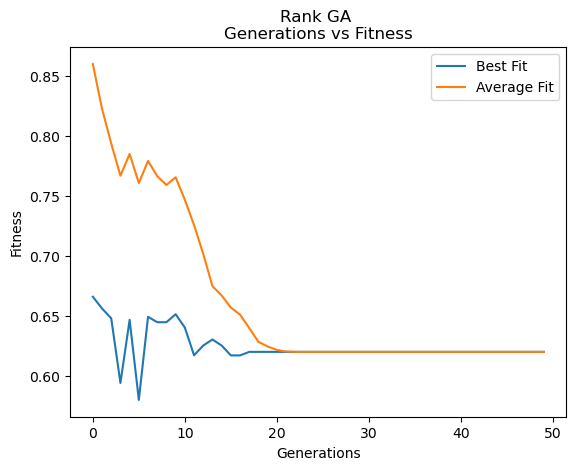

In [77]:
# plotting the points
def createList(r1, r2):
    return [item for item in range(r1, r2)]

gen = createList(0,generationsRank)
plt.plot(gen, bestFitRank)
plt.plot(gen, avgFitRank)
plt.legend(['Best Fit','Average Fit'])
# naming the x axis
plt.xlabel('Generations')
# naming the y axis
plt.ylabel('Fitness')
  
# giving a title to my graph
plt.title('Rank GA \nGenerations vs Fitness')  
# function to show the plot
plt.show()

In [37]:
Sampledataset = Fulldataset[:-200000]
print("Generations Run 1: ", generationsRank)
print("Generations Run 2: ", generationsRank2)
print("Fitness Run 1: ", round(calculateDistance(bestKeyboardRank.keyboard[0],Sampledataset,STP)/len(Sampledataset),4))
print("Fitness Run 2: ", round(calculateDistance(bestKeyboardRank2.keyboard[0],Sampledataset,STP)/len(Sampledataset),4))

Generations Run 1:  50
Generations Run 2:  50
Fitness Run 1:  0.6196
Fitness Run 2:  0.5738


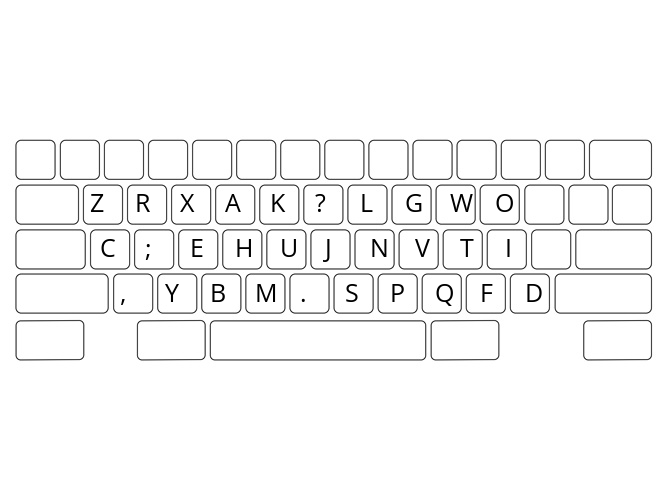

In [38]:
displayKeyboard(bestKeyboardRank.keyboard[0])

<font size ="5"><b>Elitisim + Rank Based Breeding GA</b></font><br><br>
The Elitisim + Rank GA will have th following traits:<br>
- Generations: 50
- Population: 50
- Text Corpus: 100,000 characters
- Crossover Method: Single point crossover
- Selection Model: Rank roulette wheel selection
- Mutation Method: None
- Elitism: 10%
- Stopping Condition: 50 generations

In [39]:
generations = 50
popSize = 50
STP = STP = [1,4,7,10,19,22,25,28] #StartingPositions
twoCrossOverFlag = False
elitismRate = 0.1
mutationRate = 0
swapChance = 0
shuffleChance = 0 
inverseChance = 0

In [40]:
Fulldataset = getRefinedDataset()
dataset = Fulldataset[:100000]
dataset2 = Fulldataset[100000:200000]

stER = time.process_time()
bestKeyboardER,avgFitER,bestFitER,generationsER = GeneticAlgorithim(generations,popSize,dataset,STP,twoCrossOverFlag,
                                                                           elitismRate,mutationRate,swapChance,shuffleChance,inverseChance)
etER = time.process_time()
elapsed_timeER = etER - stER
print('Execution time:', elapsed_timeER, 'seconds')

stER2 = time.process_time()
bestKeyboardER2,avgFitER2,bestFitER2,generationsER2 = GeneticAlgorithim(generations,popSize,dataset2,STP,twoCrossOverFlag,
                                                                           elitismRate,mutationRate,swapChance,shuffleChance,inverseChance)
etER2 = time.process_time()
elapsed_timeER2 = etER2 - stER2
print('Execution time:', elapsed_timeER2, 'seconds')

Execution time: 716.734375 seconds
Execution time: 736.03125 seconds


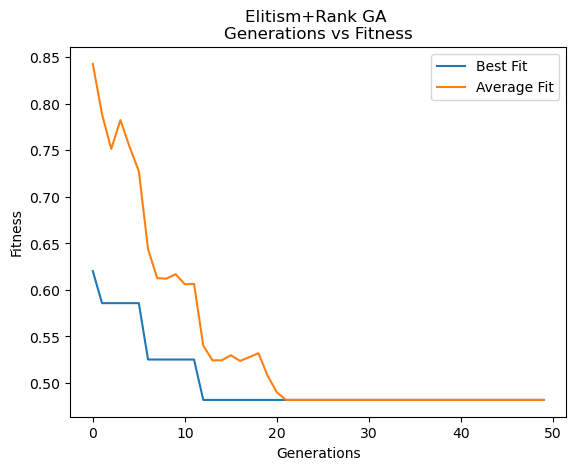

In [78]:
gen = createList(0,generationsER2)
plt.plot(gen, bestFitER2)
plt.plot(gen, avgFitER2)
plt.legend(['Best Fit','Average Fit'])
# naming the x axis
plt.xlabel('Generations')
# naming the y axis
plt.ylabel('Fitness')
  
# giving a title to my graph
plt.title('Elitism+Rank GA \nGenerations vs Fitness')  
# function to show the plot
plt.show()

In [42]:
Sampledataset = Fulldataset[:-200000]
print("Generations Run 1: ", generationsER)
print("Generations Run 2: ", generationsER2)
print("Fitness Run 1: ", round(calculateDistance(bestKeyboardER.keyboard[0],Sampledataset,STP)/len(Sampledataset),4))
print("Fitness Run 2: ", round(calculateDistance(bestKeyboardER2.keyboard[0],Sampledataset,STP)/len(Sampledataset),4))

Generations Run 1:  50
Generations Run 2:  50
Fitness Run 1:  0.4588
Fitness Run 2:  0.4904


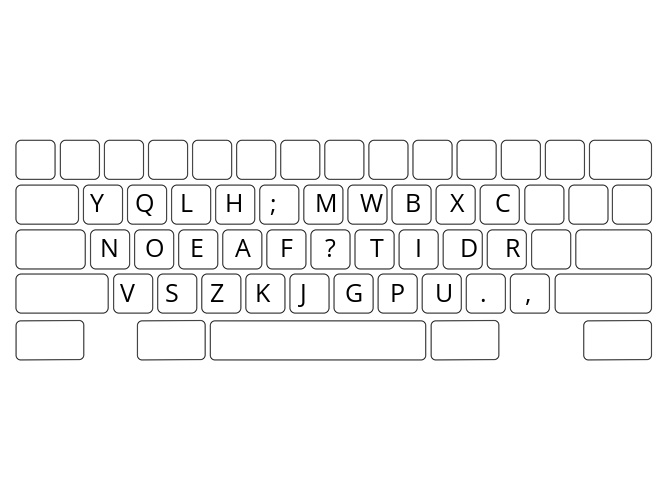

In [43]:
displayKeyboard(bestKeyboardER.keyboard[0])

<font size ="5"><b>Elitisim + Rank based breeding + Two point crossover GA</b></font><br><br>
The Elitisim + Rank + Two point crossover GA will have the following traits:<br>
- Generation: 50
- Population: 50
- Text Corpus: 100,000 characters
- Crossover Method: Two point crossover
- Selection Model: Rank roulette wheel selection
- Mutation Method: None
- Elitism: 10%
- Stopping Condition: 50 generations

In [95]:
generations = 50
popSize = 50
STP = [1,4,7,10,19,22,25,28] #StartingPositions
twoCrossOverFlag = True
elitismRate = 0.1
mutationRate = 0
swapChance = 0
shuffleChance = 0 
inverseChance = 0

In [96]:
STP = [1,4,7,10,19,22,25,28] #StartingPositions

Fulldataset = getRefinedDataset()
dataset = Fulldataset[:100000]
dataset2 = Fulldataset[100000:200000]

stERT = time.process_time()
bestKeyboardERT,avgFitERT,bestFitERT,generationsERT = GeneticAlgorithim(generations,popSize,dataset,STP,twoCrossOverFlag,
                                                                           elitismRate,mutationRate,swapChance,shuffleChance,inverseChance)
etERT = time.process_time()
elapsed_timeERT = etERT - stERT
print('Execution time:', elapsed_timeERT, 'seconds')

stERT2 = time.process_time()
bestKeyboardERT2,avgFitERT2,bestFitERT2,generationsERT2 = GeneticAlgorithim(generations,popSize,dataset2,STP,twoCrossOverFlag,
                                                                           elitismRate,mutationRate,swapChance,shuffleChance,inverseChance)
etERT2 = time.process_time()
elapsed_timeERT2 = etERT2 - stERT2
print('Execution time:', elapsed_timeERT2, 'seconds')

Execution time: 426.03125 seconds
Execution time: 432.796875 seconds


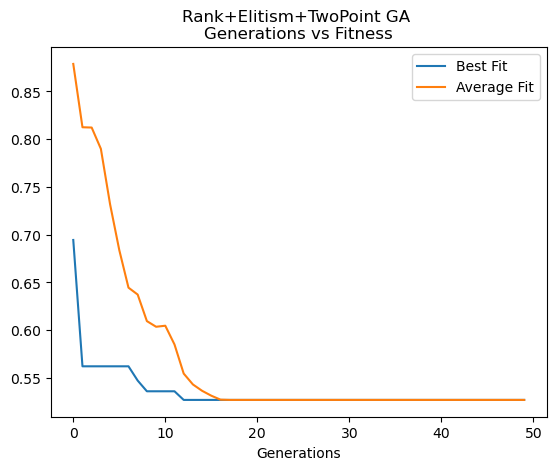

In [100]:
gen = createList(0,generationsERT)
plt.plot(gen, bestFitERT)
plt.plot(gen, avgFitERT)
plt.legend(['Best Fit','Average Fit'])
# naming the x axis
plt.xlabel('Generations')
# naming the y axisplt.ylabel('Fitness')
  
# giving a title to my graph
plt.title('Rank+Elitism+TwoPoint GA \nGenerations vs Fitness')
  
# function to show the plot
plt.show()

In [98]:
Sampledataset = Fulldataset[:-200000]
print("Generations Run 1: ", generationsERT)
print("Generations Run 2: ", generationsERT2)
print("Fitness Run 1: ", round(calculateDistance(bestKeyboardERT.keyboard[0],Sampledataset,STP)/len(Sampledataset),4))
print("Fitness Run 2: ", round(calculateDistance(bestKeyboardERT2.keyboard[0],Sampledataset,STP)/len(Sampledataset),4))

Generations Run 1:  50
Generations Run 2:  50
Fitness Run 1:  0.5208
Fitness Run 2:  0.4737


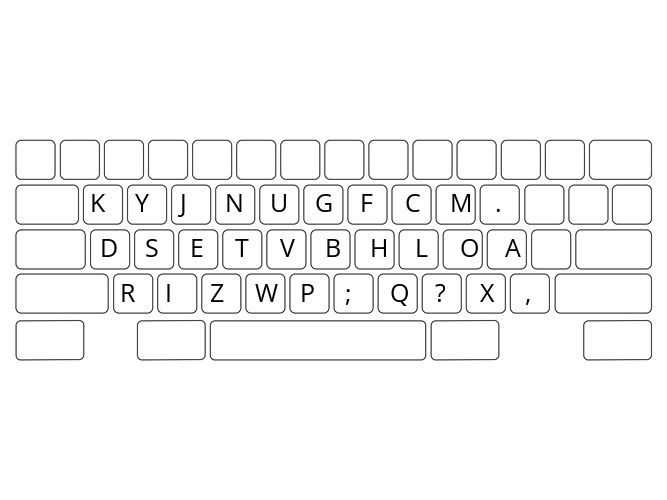

In [99]:
displayKeyboard(bestKeyboardERT.keyboard[0])

<font size ="5"><b>Final GA</b></font><br><br>
The Final GA will have the following traits:<br>
- Generation: 50
- Population: 50
- Text Corpus: 100,000 characters
- Crossover Method: Two point crossover
- Selection Model: Rank roulette wheel selection
- Mutation Rate: 10%
- Mutation Method: Swap, Shuffle, Inverse: 33.33%
- Elitism: 10%
- Stopping Condition: 50 generations

In [49]:
generations = 50
popSize = 50
STP = STP = [1,4,7,10,19,22,25,28] #StartingPositions
twoCrossOverFlag = True
elitismRate = 0.1
mutationRate = 0.1
swapChance = 0.33
shuffleChance = 0.33 
inverseChance = 0.33

In [50]:
Fulldataset = getRefinedDataset()
dataset = Fulldataset[:100000]
dataset2 = Fulldataset[100000:200000]

stFin = time.process_time()
bestKeyboardFin,avgFitFin,bestFitFin,generationsFin = GeneticAlgorithim(generations,popSize,dataset,STP,twoCrossOverFlag,
                                                                           elitismRate,mutationRate,swapChance,shuffleChance,inverseChance)
etFin = time.process_time()
elapsed_timeFin = etFin - stFin
print('Execution time:', elapsed_timeFin, 'seconds')

stFin2 = time.process_time()
bestKeyboardFin2,avgFitFin2,bestFitFin2,generationsFin2 = GeneticAlgorithim(generations,popSize,dataset,STP,twoCrossOverFlag,
                                                                           elitismRate,mutationRate,swapChance,shuffleChance,inverseChance)
etFin2 = time.process_time()
elapsed_timeFin2 = etFin2 - stFin2
print('Execution time:', elapsed_timeFin2, 'seconds')

Execution time: 789.5625 seconds
Execution time: 767.21875 seconds


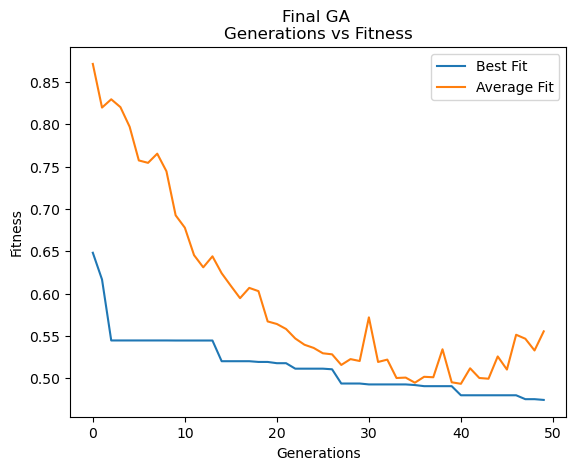

In [101]:
# plotting the points
def createList(r1, r2):
    return [item for item in range(r1, r2)]

gen = createList(0,generationsFin2)
plt.plot(gen, bestFitFin2)
plt.plot(gen, avgFitFin2)
plt.legend(['Best Fit','Average Fit'])
# naming the x axis
plt.xlabel('Generations')
# naming the y axis
plt.ylabel('Fitness')
  
# giving a title to my graph
plt.title('Final GA \nGenerations vs Fitness')
  
# function to show the plot
plt.show()

In [52]:
Sampledataset = Fulldataset[:-200000]
print("Generations Run 1: ", generationsFin)
print("Generations Run 2: ", generationsFin2)
print("Fitness Run 1: ", round(calculateDistance(bestKeyboardFin.keyboard[0],Sampledataset,STP)/len(Sampledataset),4))
print("Fitness Run 2: ", round(calculateDistance(bestKeyboardFin2.keyboard[0],Sampledataset,STP)/len(Sampledataset),4))

Generations Run 1:  50
Generations Run 2:  50
Fitness Run 1:  0.4462
Fitness Run 2:  0.4709


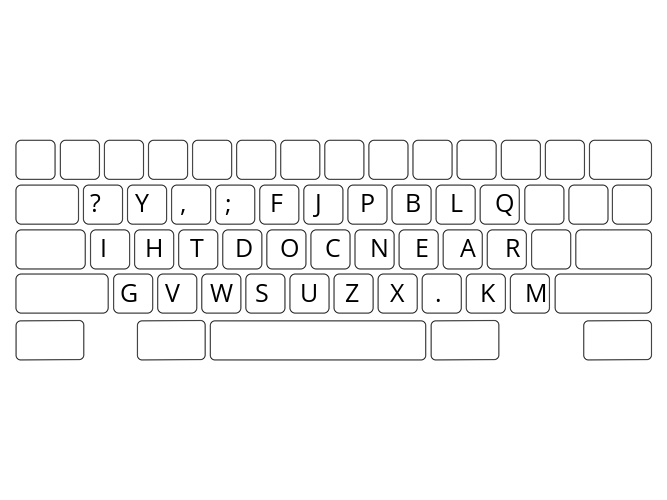

In [53]:
displayKeyboard(bestKeyboardFin.keyboard[0])

<font size ="5"><b>Observations and Further Testing</b></font><br><br>

<font size ="4"><b>Decreasing Dataset Size to 10,000</b></font><br><br>
- Generation: 50
- Population: 50
- Text Corpus: 10,000 characters
- Crossover Method: Two point crossover
- Selection Model: Rank roulette wheel selection
- Mutation Rate: 10%
- Mutation Method: Swap, Shuffle, Inverse: 33.33%
- Elitism: 10%
- Stopping Condition: 50 generations

In [54]:
generations = 50
popSize = 50
STP = [1,4,7,10,19,22,25,28] #StartingPositions
twoCrossOverFlag = True
elitismRate = 0.1
mutationRate = 0.1
swapChance = 0.33
shuffleChance = 0.33 
inverseChance = 0.33

In [55]:
Fulldataset = getRefinedDataset()
dataset = Fulldataset[:10000]
dataset2 = Fulldataset[10000:20000]

stFin3 = time.process_time()
bestKeyboardFin3,avgFitFin3,bestFitFin3,generationsFin3 = GeneticAlgorithim(generations,popSize,dataset,STP,twoCrossOverFlag,
                                                                           elitismRate,mutationRate,swapChance,shuffleChance,inverseChance)
etFin3 = time.process_time()
elapsed_timeFin3 = etFin3 - stFin3
print('Execution time:', elapsed_timeFin3, 'seconds')

stFin4 = time.process_time()
bestKeyboardFin4,avgFitFin4,bestFitFin4,generationsFin4 = GeneticAlgorithim(generations,popSize,dataset,STP,twoCrossOverFlag,
                                                                           elitismRate,mutationRate,swapChance,shuffleChance,inverseChance)
etFin4 = time.process_time()
elapsed_timeFin4 = etFin4 - stFin4
print('Execution time:', elapsed_timeFin4, 'seconds')

Execution time: 80.40625 seconds
Execution time: 77.0625 seconds


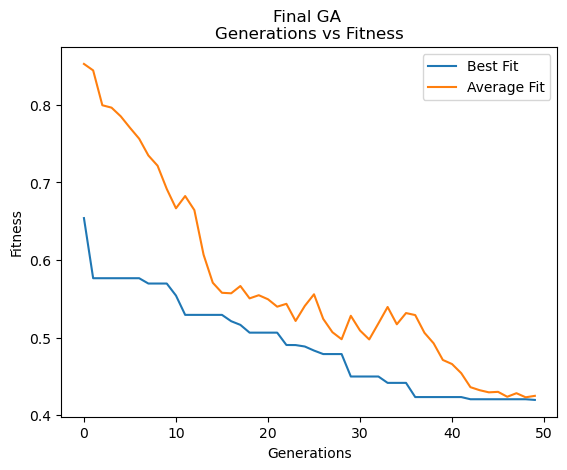

In [102]:
# plotting the points
def createList(r1, r2):
    return [item for item in range(r1, r2)]

gen = createList(0,generationsFin4)
plt.plot(gen, bestFitFin4)
plt.plot(gen, avgFitFin4)
plt.legend(['Best Fit','Average Fit'])
# naming the x axis
plt.xlabel('Generations')
# naming the y axis
plt.ylabel('Fitness')
  
# giving a title to my graph
plt.title('Final GA \nGenerations vs Fitness')
  
# function to show the plot
plt.show()

In [57]:
Sampledataset = Fulldataset[:-20000]
print("Generations Run 1: ", generationsFin3)
print("Generations Run 2: ", generationsFin4)
print("Fitness Run 1: ", round(calculateDistance(bestKeyboardFin3.keyboard[0],Sampledataset,STP)/len(Sampledataset),4))
print("Fitness Run 2: ", round(calculateDistance(bestKeyboardFin4.keyboard[0],Sampledataset,STP)/len(Sampledataset),4))

Generations Run 1:  50
Generations Run 2:  50
Fitness Run 1:  0.4511
Fitness Run 2:  0.4185


<font size ="4"><b>Increasing Population Size to 100</b></font><br><br>
- Generation: 50
- Population: 100
- Text Corpus: 10,000 characters
- Crossover Method: Two point crossover
- Selection Model: Rank roulette wheel selection
- Mutation Rate: 10%
- Mutation Method: Swap, Shuffle, Inverse: 33.33%
- Elitism: 10%
- Stopping Condition: 50 generations

In [58]:
generations = 50
popSize = 100
STP = STP = [1,4,7,10,19,22,25,28] #StartingPositions
twoCrossOverFlag = True
elitismRate = 0.1
mutationRate = 0.1
swapChance = 0.33
shuffleChance = 0.33 
inverseChance = 0.33

In [59]:
Fulldataset = getRefinedDataset()
dataset = Fulldataset[:10000]
dataset2 = Fulldataset[10000:20000]

stPop = time.process_time()
bestKeyboardPop,avgFitPop,bestFitPop,generationsPop = GeneticAlgorithim(generations,popSize,dataset,STP,twoCrossOverFlag,
                                                                           elitismRate,mutationRate,swapChance,shuffleChance,inverseChance)
etPop = time.process_time()
elapsed_timePop = etPop - stPop
print('Execution time:', elapsed_timePop, 'seconds')

stPop2 = time.process_time()
bestKeyboardPop2,avgFitPop2,bestFitPop2,generationsPop2 = GeneticAlgorithim(generations,popSize,dataset,STP,twoCrossOverFlag,
                                                                           elitismRate,mutationRate,swapChance,shuffleChance,inverseChance)
etPop2 = time.process_time()
elapsed_timePop2 = etPop2 - stPop2
print('Execution time:', elapsed_timePop2, 'seconds')

Execution time: 158.96875 seconds
Execution time: 161.90625 seconds


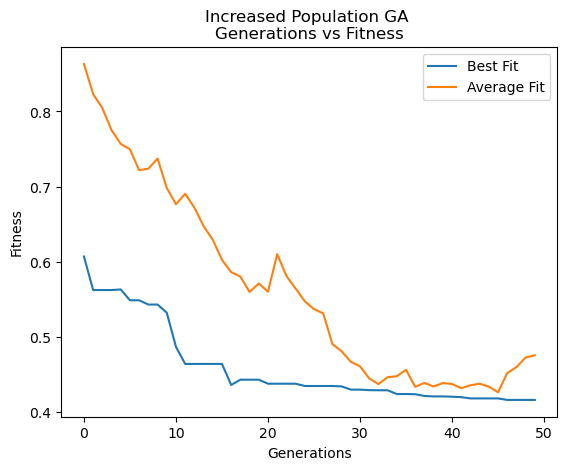

In [104]:
# plotting the points
def createList(r1, r2):
    return [item for item in range(r1, r2)]

gen = createList(0,generationsPop)
plt.plot(gen, bestFitPop)
plt.plot(gen, avgFitPop)
plt.legend(['Best Fit','Average Fit'])
# naming the x axis
plt.xlabel('Generations')
# naming the y axis
plt.ylabel('Fitness')
  
# giving a title to my graph
plt.title('Increased Population GA \nGenerations vs Fitness')
  
# function to show the plot
plt.show()

In [61]:
Sampledataset = Fulldataset[:-20000]
print("Generations Run 1: ", generationsPop)
print("Generations Run 2: ", generationsPop2)
print("Fitness Run 1: ", round(calculateDistance(bestKeyboardPop.keyboard[0],Sampledataset,STP)/len(Sampledataset),4))
print("Fitness Run 2: ", round(calculateDistance(bestKeyboardPop2.keyboard[1],Sampledataset,STP)/len(Sampledataset),4))

Generations Run 1:  50
Generations Run 2:  50
Fitness Run 1:  0.4168
Fitness Run 2:  0.4591


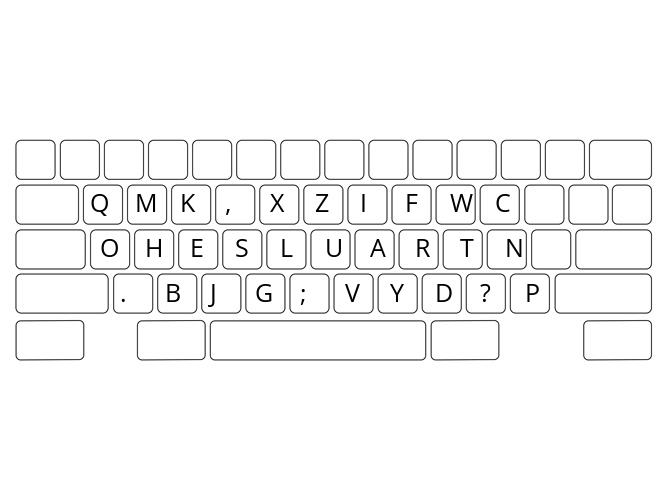

In [133]:
displayKeyboard(bestKeyboardPop.keyboard[0])

<font size ="4"><b>Increasing Mutation Rate to 20%</b></font><br><br>
- Generation: 50
- Population: 50
- Text Corpus: 100,000 characters
- Crossover Method: Two point crossover
- Selection Model: Rank roulette wheel selection
- Mutation Rate: 20%
- Mutation Method: Swap, Shuffle, Inverse: 33.33%
- Elitism: 10%
- Stopping Condition: 50 generations

In [105]:
generations = 50
popSize = 50
STP = [1,4,7,10,19,22,25,28] #StartingPositions
twoCrossOverFlag = True
elitismRate = 0.1
mutationRate = 0.2
swapChance = 0.33
shuffleChance = 0.33
inverseChance = 0.33

In [106]:
Fulldataset = getRefinedDataset()
dataset = Fulldataset[:10000]
dataset2 = Fulldataset[10000:20000]

stMut = time.process_time()
bestKeyboardMut,avgFitMut,bestFitMut,generationsMut = GeneticAlgorithim(generations,popSize,dataset,STP,twoCrossOverFlag,
                                                                           elitismRate,mutationRate,swapChance,shuffleChance,inverseChance)
etMut = time.process_time()
elapsed_timeMut = etMut - stMut
print('Execution time:', elapsed_timeMut, 'seconds')

stMut2 = time.process_time()
bestKeyboardMut2,avgFitMut2,bestFitMut2,generationsMut2 = GeneticAlgorithim(generations,popSize,dataset,STP,twoCrossOverFlag,
                                                                           elitismRate,mutationRate,swapChance,shuffleChance,inverseChance)
etMut2 = time.process_time()
elapsed_timeMut2 = etMut2 - stMut2
print('Execution time:', elapsed_timeMut2, 'seconds')

Execution time: 38.859375 seconds
Execution time: 40.125 seconds


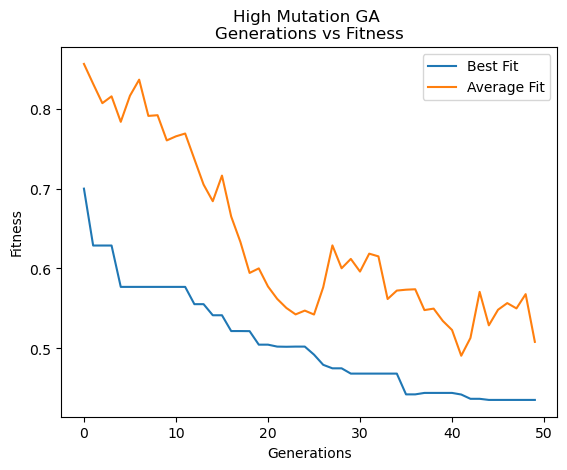

In [129]:
# plotting the points
def createList(r1, r2):
    return [item for item in range(r1, r2)]

gen = createList(0,generationsMut2)
plt.plot(gen, bestFitMut2)
plt.plot(gen, avgFitMut2)
plt.legend(['Best Fit','Average Fit'])
# naming the x axis
plt.xlabel('Generations')
# naming the y axis
plt.ylabel('Fitness')
  
# giving a title to my graph
plt.title('High Mutation GA \nGenerations vs Fitness')
  
# function to show the plot
plt.show()

In [108]:
Sampledataset = Fulldataset[:-20000]
print("Generations Run 1: ", generationsMut)
print("Generations Run 2: ", generationsMut2)
print("Fitness Run 1: ", round(calculateDistance(bestKeyboardMut.keyboard[0],Sampledataset,STP)/len(Sampledataset),4))
print("Fitness Run 2: ", round(calculateDistance(bestKeyboardMut2.keyboard[1],Sampledataset,STP)/len(Sampledataset),4))

Generations Run 1:  50
Generations Run 2:  50
Fitness Run 1:  0.4257
Fitness Run 2:  0.4306


<font size ="4"><b>Increasing Generations to 100</b></font><br><br>
- Generation: 100
- Population: 50
- Text Corpus: 10,000 characters
- Crossover Method: Two point crossover
- Selection Model: Rank roulette wheel selection
- Mutation Rate: 10%
- Mutation Method: Swap, Shuffle, Inverse: 33.33%
- Elitism: 10%
- Stopping Condition: 50 generations

In [125]:
generations = 100
popSize = 50
STP = [1,4,7,10,19,22,25,28] #StartingPositions
twoCrossOverFlag = True
elitismRate = 0.1
mutationRate = 0.1
swapChance = 0.33
shuffleChance = 0.33
inverseChance = 0.33

In [126]:
Fulldataset = getRefinedDataset()
dataset = Fulldataset[:10000]
dataset2 = Fulldataset[10000:20000]

stGen = time.process_time()
bestKeyboardGen,avgFitGen,bestFitGen,generationsGen = GeneticAlgorithim(generations,popSize,dataset,STP,twoCrossOverFlag,
                                                                           elitismRate,mutationRate,swapChance,shuffleChance,inverseChance)
etGen = time.process_time()
elapsed_timeGen = etGen - stGen
print('Execution time:', elapsed_timeGen, 'seconds')

stGen2 = time.process_time()
bestKeyboardGen2,avgFitGen2,bestFitGen2,generationsGen2 = GeneticAlgorithim(generations,popSize,dataset,STP,twoCrossOverFlag,
                                                                           elitismRate,mutationRate,swapChance,shuffleChance,inverseChance)
etGen2 = time.process_time()
elapsed_timeGen2 = etGen2 - stGen2
print('Execution time:', elapsed_timeGen2, 'seconds')

Execution time: 79.375 seconds
Execution time: 79.609375 seconds


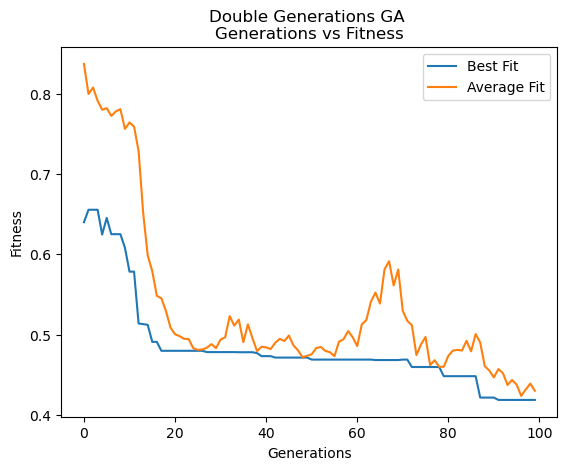

In [131]:
# plotting the points
def createList(r1, r2):
    return [item for item in range(r1, r2)]

gen = createList(0,generationsGen2)
plt.plot(gen, bestFitGen2)
plt.plot(gen, avgFitGen2)
plt.legend(['Best Fit','Average Fit'])
# naming the x axis
plt.xlabel('Generations')
# naming the y axis
plt.ylabel('Fitness')
  
# giving a title to my graph
plt.title('Double Generations GA \nGenerations vs Fitness')
  
# function to show the plot
plt.show()

In [128]:
Sampledataset = Fulldataset[:-20000]
print("Generations Run 1: ", generationsGen)
print("Generations Run 2: ", generationsGen2)
print("Fitness Run 1: ", round(calculateDistance(bestKeyboardGen.keyboard[0],Sampledataset,STP)/len(Sampledataset),4))
print("Fitness Run 2: ", round(calculateDistance(bestKeyboardGen2.keyboard[1],Sampledataset,STP)/len(Sampledataset),4))

Generations Run 1:  100
Generations Run 2:  100
Fitness Run 1:  0.4498
Fitness Run 2:  0.418
